In [1]:
import importlib
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
import sys
import warnings
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from ecpaper_utils import jlat_utils as jlat
from ecpaper_utils import bootstrap_utils as boot

warnings.filterwarnings('ignore')

In [2]:
datapath="/project/cas/islas/python_savs/ecpaper2020/DATASORT/SHJET/"
uzmcmip5=xr.open_dataset(datapath+"uzmcmip5.nc")
uzmcmip6=xr.open_dataset(datapath+"uzmcmip6.nc")
jlatcmip5=xr.open_dataset(datapath+"jlatcmip5.nc")
jlatcmip6=xr.open_dataset(datapath+"jlatcmip6.nc")

In [3]:
uzmcmip5m = uzmcmip5.mean('model')
latpastmax5 , speedpastmax5 =jlat.calcjetlat(uzmcmip5m['uzmpast'], -80, -20 )
latpeak5, speedpeak5 = jlat.calcjetlat(uzmcmip5m['uzmfut']-uzmcmip5m['uzmpast'], -80, -20)
lattrough5, speedtrough5 = jlat.calcjetlat(-1.*(uzmcmip5m['uzmfut']-uzmcmip5m['uzmpast']), -80, -20)
speedtrough5=-1.*speedtrough5

latpeakall5=np.zeros([uzmcmip5.model.size]) ; speedpeakall5=np.zeros([uzmcmip5.model.size])
lattroughall5=np.zeros([uzmcmip5.model.size]) ; speedtroughall5=np.zeros([uzmcmip5.model.size])
for imodel in np.arange(0,uzmcmip5.model.size,1):
    udif=(uzmcmip5['uzmfut'].isel(model=imodel) - uzmcmip5['uzmpast'].isel(model=imodel)).dropna('lat')
    lat, speed = jlat.calcjetlat(udif.dropna('lat'), -65, -40)
    latpeakall5[imodel]=lat ; speedpeakall5[imodel]=speed
    
    lat, speed = jlat.calcjetlat(-1.*udif.dropna('lat'), -45, -10)
    lattroughall5[imodel]=lat ; speedtroughall5[imodel]=-1.*speed

rpeak5 = np.corrcoef(jlatcmip5['jlatemp'], speedpeakall5)[0,1]
minrpeak5, maxrpeak5 = boot.boot_corr_ci(jlatcmip5['jlatemp'], speedpeakall5, 95)
rtrough5 = np.corrcoef(jlatcmip5['jlatemp'], speedtroughall5)[0,1]
minrtrough5, maxrtrough5 = boot.boot_corr_ci(jlatcmip5['jlatemp'], speedtroughall5, 95)
    
    
uzmcmip6m = uzmcmip6.mean('model')
latpastmax6 , speedpastmax6 =jlat.calcjetlat(uzmcmip6m['uzmpast'], -80, -20 )
latpeak6, speedpeak6 = jlat.calcjetlat(uzmcmip6m['uzmfut']-uzmcmip6m['uzmpast'], -80, -20)
lattrough6, speedtrough6 = jlat.calcjetlat(-1.*(uzmcmip6m['uzmfut']-uzmcmip6m['uzmpast']), -80, -20)
speedtrough6=-1.*speedtrough6


latpeakall6=np.zeros([uzmcmip6.model.size]) ; speedpeakall6=np.zeros([uzmcmip6.model.size])
lattroughall6=np.zeros([uzmcmip6.model.size]) ; speedtroughall6=np.zeros([uzmcmip6.model.size])
for imodel in np.arange(0,uzmcmip6.model.size,1):
    udif=uzmcmip6['uzmfut'].isel(model=imodel) - uzmcmip6['uzmpast'].isel(model=imodel)
    lat, speed = jlat.calcjetlat(udif.dropna('lat'), -65, -40)
    latpeakall6[imodel]=lat ; speedpeakall6[imodel]=speed
    
    lat, speed = jlat.calcjetlat(-1.*udif.dropna('lat'), -45, -10)
    lattroughall6[imodel]=lat ; speedtroughall6[imodel]=-1.*speed

#get rid of models where peak and trough isn't well defined
jlatvals = jlatcmip6['jlatemp']
jlatvals = jlatvals[np.logical_not(np.isnan(speedpeakall6))]
speedtroughall6 = speedtroughall6[np.logical_not(np.isnan(speedpeakall6))]
latpeakall6 = latpeakall6[np.logical_not(np.isnan(speedpeakall6))]
lattroughall6 = lattroughall6[np.logical_not(np.isnan(speedpeakall6))]
speedpeakall6 = speedpeakall6[np.logical_not(np.isnan(speedpeakall6))]

jlatvals = jlatvals[np.logical_not(np.isnan(speedtroughall6))]
speedpeakall6 = speedpeakall6[np.logical_not(np.isnan(speedtroughall6))]
latpeakall6 = latpeakall6[np.logical_not(np.isnan(speedtroughall6))]
lattroughall6 = lattroughall6[np.logical_not(np.isnan(speedtroughall6))]
speedtroughall6 = speedtroughall6[np.logical_not(np.isnan(speedtroughall6))]

    
rpeak6 = np.corrcoef(jlatvals, speedpeakall6)[0,1]
minrpeak6, maxrpeak6 = boot.boot_corr_ci(jlatvals, speedpeakall6, 95)
rtrough6 = np.corrcoef(jlatvals, speedtroughall6)[0,1]
minrtrough6, maxrtrough6 = boot.boot_corr_ci(jlatvals, speedtroughall6, 95)

!!!! no local maximum found in calcjetlat
!!!! no local maximum found in calcjetlat


In [4]:
def conv2str(x):
    xstr = '{0:6.2f}'.format(np.array(x)).strip()
    return xstr

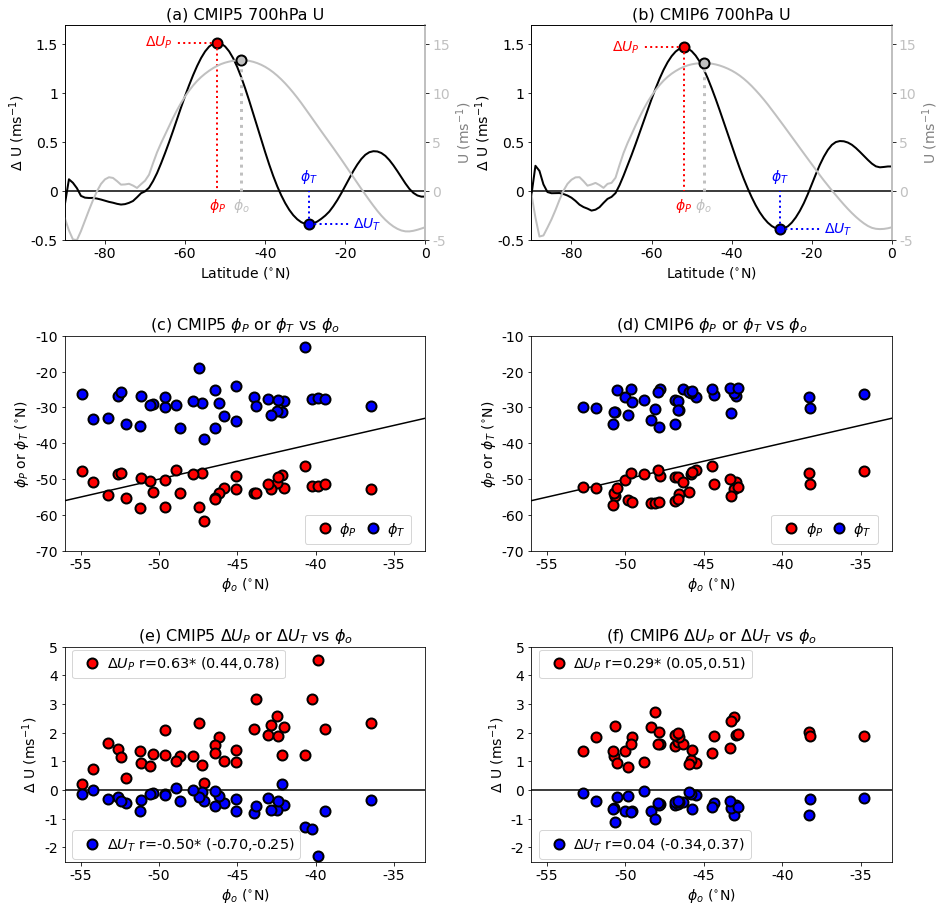

In [5]:
fig, axs = plt.subplots(ncols=2, nrows=3)
fig.set_size_inches(14,14)
fig.tight_layout(pad=7.5)
    
# PANEL A
ax=axs[0,0]
ax.set_xlim(-90,0)
ax.set_xticks([-80,-60,-40,-20,0])
ax.set_xticklabels(['-80','-60','-40','-20','0'], fontsize=14)
ax.set_xlabel('Latitude ($^{\circ}$N)', fontsize=14)
ax.set_ylim(-0.5,1.7)
ax.set_yticks([-0.5,0,0.5,1,1.5])
ax.set_yticklabels(['-0.5','0','0.5','1','1.5'], fontsize=14)
ax.set_ylabel('$\Delta$ U (ms$^{-1}$)', fontsize=14)
ax.set_title('(a) CMIP5 700hPa U', fontsize=16)
ax.plot([-90,0],[0,0], color='black')
ax.plot(uzmcmip5m.lat, uzmcmip5m['uzmfut']-uzmcmip5m['uzmpast'], linewidth=2, color='black', zorder=1)
ax.plot(latpeak5, speedpeak5, "o", markerfacecolor='red', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(lattrough5, speedtrough5, "o", markerfacecolor='blue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot([latpeak5, latpeak5],[speedpeak5,0], color='red', linestyle='dotted', linewidth=2)
ax.plot([lattrough5, lattrough5],[speedtrough5, 0], color='blue', linestyle='dotted', linewidth=2)
ax.text(latpeak5, -0.15,'$\phi_{P}$', horizontalalignment='center', verticalalignment='center', fontsize=14, color='red')
ax.text(lattrough5, 0.15,'$\phi_{T}$', horizontalalignment='center', verticalalignment='center', fontsize=14, color='blue')
ax.plot([latpeak5, latpeak5-10],[speedpeak5, speedpeak5], color='red', linestyle='dotted', linewidth=2)
ax.text(latpeak5-10-1,speedpeak5,'$\Delta U_{P}$', fontsize=14, color='red', horizontalalignment='right', verticalalignment='center')
ax.plot([lattrough5,lattrough5+10],[speedtrough5, speedtrough5], color='blue', linestyle='dotted', linewidth=2)
ax.text(lattrough5+10+1,speedtrough5,'$\Delta U_{T}$', fontsize=14, color='blue', horizontalalignment='left', verticalalignment='center')

ax2 = ax.twinx()
ax2.set_ylabel('U (ms$^{-1}$)', color='gray', fontsize=14)
ax2.set_ylim(-5,17)
ax2.set_yticks([-5,0,5,10,15])
ax2.set_yticklabels(['-5','0','5','10','15'], fontsize=14, color='silver')
ax2.spines['right'].set_color('silver')
ax2.spines['right'].set_linewidth(2)
ax2.plot(uzmcmip5m.lat, uzmcmip5m['uzmpast'], linewidth=2, color='silver', zorder=0)
ax2.plot(latpastmax5, speedpastmax5,"o", markerfacecolor='silver', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax2.plot([latpastmax5, latpastmax5],[0,speedpastmax5], color='silver', linestyle='dotted', linewidth=3)
ax2.text(latpastmax5, -1.5,'$\phi_{o}$', horizontalalignment='center', verticalalignment='center', fontsize=14, color='silver')

# PANEL B
ax=axs[0,1]
ax.set_xlim(-90,0)
ax.set_xticks([-80,-60,-40,-20,0])
ax.set_xticklabels(['-80','-60','-40','-20','0'], fontsize=14)
ax.set_xlabel('Latitude ($^{\circ}$N)', fontsize=14)
ax.set_ylim(-0.5,1.7)
ax.set_yticks([-0.5,0,0.5,1,1.5])
ax.set_yticklabels(['-0.5','0','0.5','1','1.5'], fontsize=14)
ax.set_ylabel('$\Delta$ U (ms$^{-1}$)', fontsize=14)
ax.set_title('(b) CMIP6 700hPa U', fontsize=16)
ax.plot([-90,0],[0,0], color='black')
ax.plot(uzmcmip6m.lat, uzmcmip6m['uzmfut']-uzmcmip6m['uzmpast'], linewidth=2, color='black', zorder=1)
ax.plot(latpeak6, speedpeak6, "o", markerfacecolor='red', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(lattrough6, speedtrough6, "o", markerfacecolor='blue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot([latpeak6, latpeak6],[speedpeak6,0], color='red', linestyle='dotted', linewidth=2)
ax.plot([lattrough6, lattrough6],[speedtrough6, 0], color='blue', linestyle='dotted', linewidth=2)
ax.text(latpeak6, -0.15,'$\phi_{P}$', horizontalalignment='center', verticalalignment='center', fontsize=14, color='red')
ax.text(lattrough6, 0.15,'$\phi_{T}$', horizontalalignment='center', verticalalignment='center', fontsize=14, color='blue')
ax.plot([latpeak6, latpeak6-10],[speedpeak6, speedpeak6], color='red', linestyle='dotted', linewidth=2)
ax.text(latpeak6-10-1,speedpeak6,'$\Delta U_{P}$', fontsize=14, color='red', horizontalalignment='right', verticalalignment='center')
ax.plot([lattrough6,lattrough6+10],[speedtrough6, speedtrough6], color='blue', linestyle='dotted', linewidth=2)
ax.text(lattrough6+10+1,speedtrough6,'$\Delta U_{T}$', fontsize=14, color='blue', horizontalalignment='left', verticalalignment='center')



ax2 = ax.twinx()
ax2.set_ylabel('U (ms$^{-1}$)', color='gray', fontsize=14)
ax2.set_ylim(-5,17)
ax2.set_yticks([-5,0,5,10,15])
ax2.set_yticklabels(['-5','0','5','10','15'], fontsize=14, color='silver')
ax2.spines['right'].set_color('silver')
ax2.spines['right'].set_linewidth(2)
ax2.plot(uzmcmip6m.lat, uzmcmip6m['uzmpast'], linewidth=2, color='silver', zorder=0)
ax2.plot(latpastmax6, speedpastmax6,"o", markerfacecolor='silver', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax2.plot([latpastmax6, latpastmax6],[0,speedpastmax6], color='silver', linestyle='dotted', linewidth=3)
ax2.text(latpastmax6, -1.5,'$\phi_{o}$', horizontalalignment='center', verticalalignment='center', fontsize=14, color='silver')


# PANEL C
ax=axs[1,0]
ax.set_xlim(-56, -33)
ax.set_xticks([-55,-50,-45,-40,-35])
ax.set_xticklabels(['-55','-50','-45','-40','-35'], fontsize=14)
ax.set_xlabel('$\phi_{o}$ ($^{\circ}$N)', fontsize=14)
ax.set_ylim(-70, -10)
ax.set_yticks([-70,-60,-50,-40,-30,-20,-10])
ax.set_yticklabels(['-70','-60','-50','-40','-30','-20','-10'], fontsize=14)
ax.set_ylabel('$\phi_{P}$ or $\phi_{T}$ ($^{\circ}$N)', fontsize=14)
ax.set_title('(c) CMIP5 $\phi_{P}$ or $\phi_{T}$ vs $\phi_{o}$', fontsize=16)
ax.plot([-56,-33],[-56,-33], color='black')
ax.plot(jlatcmip5['jlatemp'], latpeakall5, "o", markerfacecolor='red', markeredgecolor='black', markersize=10, markeredgewidth=2, label="$\phi_{P}$")
ax.plot(jlatcmip5['jlatemp'], lattroughall5,"o", markerfacecolor='blue', markeredgecolor='black', markersize=10, markeredgewidth=2, label="$\phi_{T}$")

legendparts=[Line2D([0],[0], color='w', marker='o', markerfacecolor='red', markeredgecolor='black', markersize=10, markeredgewidth=2),
             Line2D([0],[0], color='w', marker='o', markerfacecolor='blue', markeredgecolor='black', markersize=10, markeredgewidth=2)]
legendlabels=['$\phi_{P}$', '$\phi_{T}$']
ax.legend(legendparts, legendlabels, loc='right', bbox_to_anchor=(0.98,0.1), ncol=2, fontsize='x-large', handletextpad=0., columnspacing=0.1)



# PANEL D
ax=axs[1,1]
ax.set_xlim(-56, -33)
ax.set_xticks([-55,-50,-45,-40,-35])
ax.set_xticklabels(['-55','-50','-45','-40','-35'], fontsize=14)
ax.set_xlabel('$\phi_{o}$ ($^{\circ}$N)', fontsize=14)
ax.set_ylim(-70, -10)
ax.set_yticks([-70,-60,-50,-40,-30,-20,-10])
ax.set_yticklabels(['-70','-60','-50','-40','-30','-20','-10'], fontsize=14)
ax.set_ylabel('$\phi_{P}$ or $\phi_{T}$ ($^{\circ}$N)', fontsize=14)
ax.set_title('(d) CMIP6 $\phi_{P}$ or $\phi_{T}$ vs $\phi_{o}$', fontsize=16)
ax.plot([-56,-33],[-56,-33], color='black')
ax.plot(jlatvals, latpeakall6, "o", markerfacecolor='red', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(jlatvals, lattroughall6,"o", markerfacecolor='blue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.legend(legendparts, legendlabels, loc='right', bbox_to_anchor=(0.98,0.1), ncol=2, fontsize='x-large', handletextpad=0., columnspacing=0.1)


# PANEL E
ax=axs[2,0]
ax.set_xlim(-56,-33)
ax.set_xticks([-55,-50,-45,-40,-35])
ax.set_xticklabels(['-55','-50','-45','-40','-35'], fontsize=14)
ax.set_xlabel('$\phi_{o}$ ($^{\circ}$N)', fontsize=14)
ax.set_ylim(-2.5,5)
ax.set_yticks([-2,-1,0,1,2,3,4,5])
ax.set_yticklabels(['-2','-1','0','1','2','3','4','5'], fontsize=14)
ax.set_ylabel('$\Delta$ U (ms$^{-1}$)', fontsize=14)
ax.set_title('(e) CMIP5 $\Delta U_{P}$ or $\Delta U_{T}$ vs $\phi_{o}$', fontsize=16)
ax.plot([-56,-33],[0,0], color='black')
ax.plot(jlatcmip5['jlatemp'], speedpeakall5, "o", markerfacecolor='red', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(jlatcmip5['jlatemp'], speedtroughall5,"o", markerfacecolor='blue', markeredgecolor='black', markersize=10, markeredgewidth=2)

if (minrpeak5 > 0) or (maxrpeak5 < 0):
    signifstr='*'
else:
    signifstr=''
legendparts=[Line2D([0],[0], color='w', marker='o', markerfacecolor='red', markeredgecolor='black', markersize=10, markeredgewidth=2)]
legendlabels=["$\Delta U_{P}$ r="+conv2str(rpeak5)+signifstr+' ('+conv2str(minrpeak5)+','+conv2str(maxrpeak5)+')']
leg1 = ax.legend(legendparts, legendlabels, loc='center left', bbox_to_anchor=(0.0,0.92), fontsize='x-large', handletextpad=0.)

if (minrtrough5 > 0) or (maxrtrough5 < 0):
    signifstr='*'
else:
    signifstr=''
legendparts=[Line2D([0],[0], color='w', marker='o', markerfacecolor='blue', markeredgecolor='black', markersize=10, markeredgewidth=2)]
legendlabels=["$\Delta U_{T}$ r="+conv2str(rtrough5)+signifstr+' ('+conv2str(minrtrough5)+','+conv2str(maxrtrough5)+')']
leg2 = ax.legend(legendparts, legendlabels, loc='center left', bbox_to_anchor=(0.0,0.08), fontsize='x-large', handletextpad=0.)
ax.add_artist(leg1)

# PANEL F
ax=axs[2,1]
ax.set_xlim(-56,-33)
ax.set_xticks([-55,-50,-45,-40,-35])
ax.set_xticklabels(['-55','-50','-45','-40','-35'], fontsize=14)
ax.set_xlabel('$\phi_{o}$ ($^{\circ}$N)', fontsize=14)
ax.set_ylim(-2.5,5)
ax.set_yticks([-2,-1,0,1,2,3,4,5])
ax.set_yticklabels(['-2','-1','0','1','2','3','4','5'], fontsize=14)
ax.set_ylabel('$\Delta$ U (ms$^{-1}$)', fontsize=14)
ax.set_title('(f) CMIP6 $\Delta U_{P}$ or $\Delta U_{T}$ vs $\phi_{o}$', fontsize=16)
ax.plot([-56,-33],[0,0], color='black')
ax.plot(jlatvals, speedpeakall6, "o", markerfacecolor='red', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(jlatvals, speedtroughall6,"o", markerfacecolor='blue', markeredgecolor='black', markersize=10, markeredgewidth=2)
if (minrpeak6 > 0) or (maxrpeak6 < 0):
    signifstr='*'
else:
    signifstr=''
legendparts=[Line2D([0],[0], color='w', marker='o', markerfacecolor='red', markeredgecolor='black', markersize=10, markeredgewidth=2)]
legendlabels=["$\Delta U_{P}$ r="+conv2str(rpeak6)+signifstr+' ('+conv2str(minrpeak6)+','+conv2str(maxrpeak6)+')']
leg1 = ax.legend(legendparts, legendlabels, loc='center left', bbox_to_anchor=(0.0,0.92), fontsize='x-large', handletextpad=0.)
if (minrtrough6 > 0) or (maxrtrough6 < 0):
    signifstr='*'
else:
    signifstr=''
legendparts=[Line2D([0],[0], color='w', marker='o', markerfacecolor='blue', markeredgecolor='black', markersize=10, markeredgewidth=2)]
legendlabels=["$\Delta U_{T}$ r="+conv2str(rtrough6)+signifstr+' ('+conv2str(minrtrough6)+','+conv2str(maxrtrough6)+')']
leg2 = ax.legend(legendparts, legendlabels, loc='center left', bbox_to_anchor=(0.0,0.08), fontsize='x-large', handletextpad=0.)
ax.add_artist(leg1)



fig.patch.set_facecolor("white")
fig.savefig('figs3.pdf', facecolor='white', bbox_inches='tight')